## Filmes


Dados reais do site de filmes IMDB https://www.imdb.com/interfaces/ serão usados e as seguintes perguntas serão respondidas:

Neste projeto python é usado através do pacote Anaconda. 

Projeto baseado no exercício do Curso Python Fundamentos para Análise de Dados 3.0 da escola online Data Science Academy.
Website: https://www.datascienceacademy.com.br/

As seguintes perguntas serão respondidas:

1- Qual o Número de Títulos Por Gênero? <br>
2- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia? <br>
3- Qual o Número de Filmes Produzidos Por País? <br>
4- Quais São os Top 10 Melhores Filmes? <br>
5- Quais São os Top 10 Piores Filmes? <br>

# Instalando e Carregando Pacotes

In [1]:
from platform import python_version #Versão da linguagem python
print ('Versão da linguagem python usada no projeto Filmes:', python_version())

Versão da linguagem python usada no projeto Filmes: 3.8.8


 Pacote usado: https://pypi.org/project/imdb-sqlite/ pesquisado em: https://pypi.org/

In [2]:
#Instala o pacote, -q indica instalação silenciosa
!pip install -q imdb-sqlite 

A próxima célula executa o pacote e realiza o dowload do dataset 

In [3]:
# Instala o pacote
# https://pypi.org/project/pycountry/

!pip install -q pycountry

In [4]:
# Importando
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

## Carregando os dados

O comando abaixo demorou 1hr pra ser finalizado no meu computador (configuração: i5, 6gb de memória)

In [5]:
%%time
!imdb-sqlite

Wall time: 1h 3min 24s


2021-09-19 23:24:34,713 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads\name.basics.tsv.gz
2021-09-19 23:27:25,671 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads\title.basics.tsv.gz
2021-09-19 23:29:54,569 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads\title.akas.tsv.gz
2021-09-19 23:32:57,391 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads\title.principals.tsv.gz
2021-09-19 23:37:27,362 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads\title.episode.tsv.gz
2021-09-19 23:38:07,276 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads\title.ratings.tsv.gz
2021-09-19 23:38:31,803 Populating database: imdb.db
2021-09-19 23:38:31,928 Applying schema
2021-09-19 23:38:31,949 Importing file: downloads\name.basics.tsv.gz
2021-09-19 23:38:31,950 Reading number of rows ...
2021-09-19 23:38:39,849 Inserting rows into table: people

  4%|4         | 499065/11234007 [00:11<04:06, 43517.98 rows/s]


 38%|###8      | 4287655/11234007 [01:38<02:41, 43032.80 rows/s]


In [6]:
conn = sqlite3.connect("imdb.db") #conecta ao banco de dados 

 57%|#####7    | 6427161/11234007 [02:29<01:51, 43045.56 rows/s]


 76%|#######6  | 8582319/11234007 [03:19<01:01, 43078.22 rows/s]


 96%|#########5| 10737421/11234007 [04:09<00:11, 43282.55 rows/s]


100%|##########| 11234007/11234007 [04:20<00:00, 43079.98 rows/s]
2021-09-19 23:43:00,643 Importing file: downloads\title.basics.tsv.gz
2021-09-19 23:43:00,643 Reading number of rows ...
2021-09-19 23:43:06,727 Inserting rows into table: titles

 39%|###8      | 3207705/8276610 [01:28<02:19, 36276.76 rows/s]


 61%|######    | 5024065/8276610 [02:18<01:29, 36517.24 rows/s]


 98%|#########7| 8109262/8276610 [04:01<00:04, 33768.00 rows/s]


100%|##########| 8276610/8276610 [04:06<00:00, 33628.89 rows/s]
2021-09-19 23:47:12,851 Importing file: downloads\title.akas.tsv.gz
2021-09-19 23:47:12,851 Reading number of rows ...
2021-09-19 23:47:24,155 Inserting rows into table: akas

  7%|6         | 2003796/29152193 [00:44<10:04, 44877.99 rows/s]


 23%|##2       | 6563794/29152193 [02:25<08:16, 45452.40 rows/s]


 42%|####1     | 12213838/29152193 [04:29<06:13, 45354.36 rows/s]


 61%|######1   | 17901588/29152193 [06:35<04:22, 42915.62 rows/s]


 85%|########4 | 24634964/29152193 [09:06<01:40, 45087.52 rows/s]


100%|##########| 29152193/29152193 [10:46<00:00, 45063.82 rows/s]
2021-09-19 23:58:11,071 Importing file: downloads\title.principals.tsv.gz
2021-09-19 23:58:11,071 Reading number of rows ...
2021-09-19 23:58:27,276 Inserting rows into table: crew

  6%|5         | 2757704/46847728 [00:51<14:03, 52294.27 rows/s]


 23%|##2       | 10678135/46847728 [03:22<11:28, 52497.12 rows/s]


 39%|###9      | 18493802/46847728 [05:52<09:07, 51815.77 rows/s]


 56%|#####6    | 26286901/46847728 [08:23<06:34, 52116.39 rows/s]


 73%|#######2  | 34087267/46847728 [10:53<04:05, 51919.63 rows/s]


 89%|########9 | 41875906/46847728 [13:23<01:34, 52475.64 rows/s]


100%|##########| 46847728/46847728 [14:59<00:00, 52071.55 rows/s]
2021-09-20 00:13:26,963 Importing file: downloads\title.episode.tsv.gz
2021-09-20 00:13:26,963 Reading number of rows ...
2021-09-20 00:13:28,533 Inserting rows into table: episodes

 54%|#####3    | 3268990/6075124 [00:54<00:47, 59272.99 rows/s]


100%|##########| 6075124/6075124 [01:40<00:00, 60255.48 rows/s]
2021-09-20 00:15:09,364 Importing file: downloads\title.ratings.tsv.gz
2021-09-20 00:15:09,364 Reading number of rows ...
2021-09-20 00:15:09,706 Inserting rows into table: ratings

100%|##########| 1187402/1187402 [00:22<00:00, 53481.11 rows/s]
2021-09-20 00:15:31,915 Creating table indices ...
2021-09-20 00:27:58,362 Import successful


In [7]:
# Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [8]:
# Tipo do objeto
type(tabelas)

pandas.core.frame.DataFrame

In [9]:
# Visualiza o resultado
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [10]:
# Vamos converter o dataframe em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [11]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




Análise para responder as perguntas

## 1- Qual o Número de Títulos Por Gênero?

In [12]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 

In [13]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [14]:
# Visualiza o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,13429
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1442,"Thriller,Western",39
1443,War,1258
1444,"War,Western",9
1445,Western,4032


In [15]:
# Converte as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [16]:
# Remove valores NA (ausentes)
temp = resultado2['genres'].dropna()

In [17]:
# Vamos criar um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [18]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [19]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [20]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [21]:
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names()

In [22]:
# Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [23]:
# Visualiza
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1446
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1447 non-null   int64
 1   adult        1447 non-null   int64
 2   adventure    1447 non-null   int64
 3   animation    1447 non-null   int64
 4   biography    1447 non-null   int64
 5   comedy       1447 non-null   int64
 6   crime        1447 non-null   int64
 7   documentary  1447 non-null   int64
 8   drama        1447 non-null   int64
 9   family       1447 non-null   int64
 10  fantasy      1447 non-null   int64
 11  film-noir    1447 non-null   int64
 12  game-show    1447 non-null   int64
 13  history      1447 non-null   int64
 14  horror       1447 non-null   int64
 15  music        1447 non-null   int64
 16  musical      1447 non-null   int64
 17  mystery      1447 non-null   int64
 18  n            1447 non-null   int64
 19  news         1447 non-null   int64
 20  reality-

In [24]:
# Drop da coluna n
generos = generos.drop(columns = 'n', axis = 0)

In [25]:
# Calcula o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [26]:
# Visualiza
generos_percentual.head(10)

drama          18.382861
comedy         16.931583
documentary    15.964064
adventure      14.858328
action         14.581894
romance        13.476158
crime          13.061507
mystery        12.577747
thriller       12.370422
fantasy        12.232205
dtype: float64

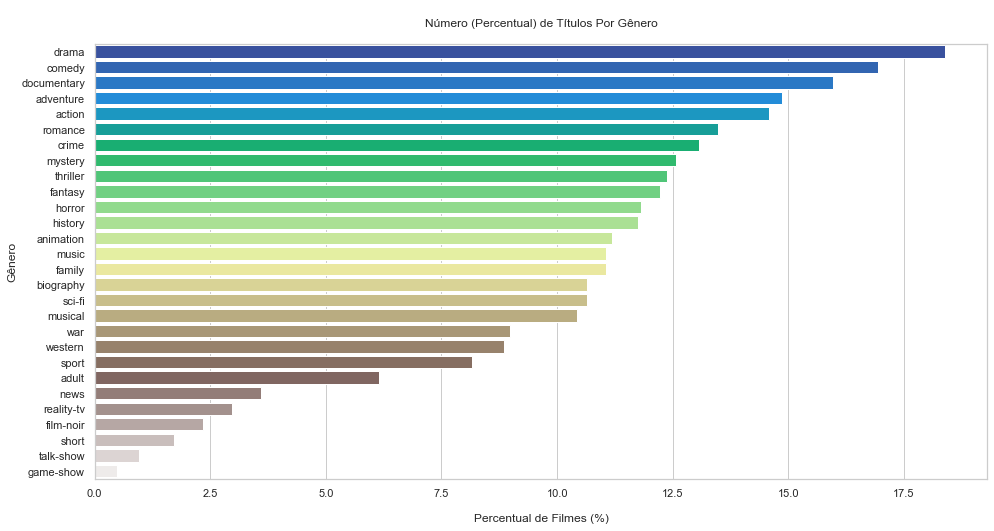

In [27]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

# 2- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?

In [28]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles ''' 

In [29]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [30]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8276605,"Action,Drama,Family"
8276606,"Action,Drama,Family"
8276607,"Action,Drama,Family"
8276608,Short


In [2]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado5)

NameError: name 'retorna_generos' is not defined

In [46]:
# Visualiza o resultado
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'n',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [47]:
# Agora fazemos a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [48]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [49]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

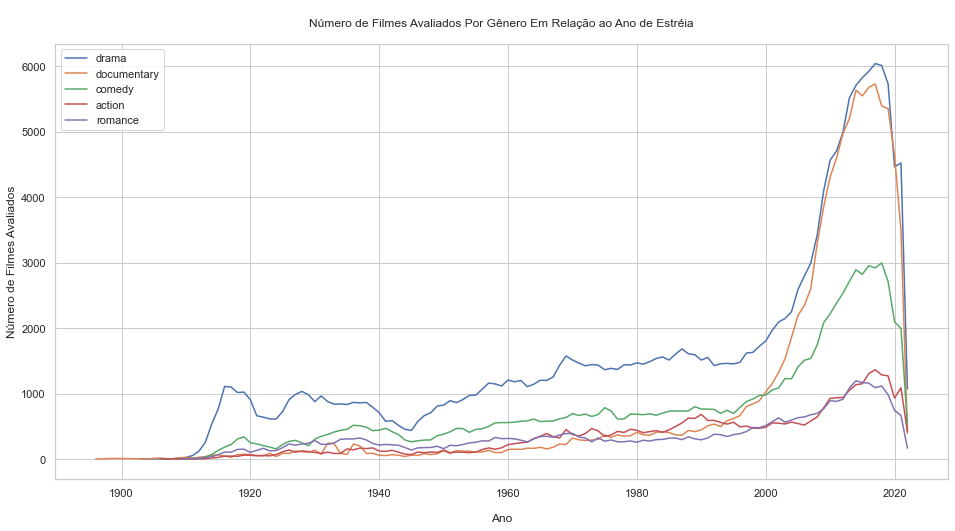

In [50]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

# 3- Qual o Número de Filmes Produzidos Por País?

In [32]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [33]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [34]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,708
2,AF,110
3,AG,12
4,AL,1234
...,...,...
229,YUCS,146
230,ZA,3052
231,ZM,11
232,ZRCD,2


In [35]:
# Shape
resultado8.shape

(234, 2)

In [36]:
# Número de linhas
resultado8.shape[0]

234

In [37]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [38]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [39]:
# Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [40]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [41]:
# Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,297445
65,United Kingdom,152694
96,Japan,88992
63,France,81878
89,India,74627
32,Canada,70821
47,Germany,67456
93,Italy,63769
26,Brazil,62877
58,Spain,62473


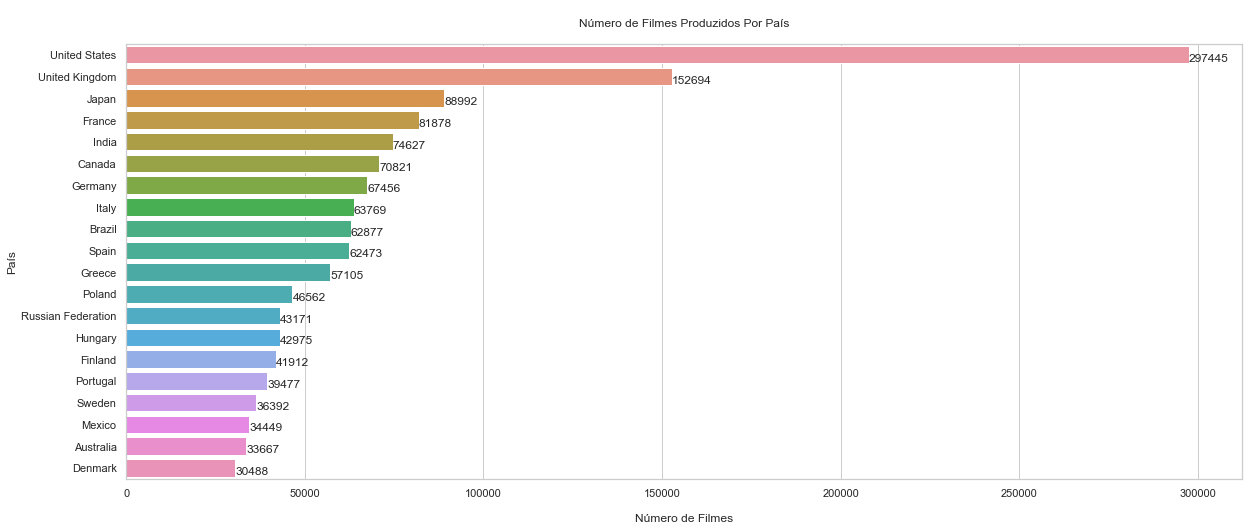

In [42]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

## 4- Quais São os Top 10 Melhores Filmes?

In [43]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [44]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

NameError: name 'consulta9' is not defined

In [1]:
display(top10_melhores_filmes)

NameError: name 'top10_melhores_filmes' is not defined

## 5- Quais São os Top 10 Piores Filmes?

In [ ]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [ ]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [ ]:
display(top10_piores_filmes)